<a href="https://colab.research.google.com/github/Somyasharmagithub/PCOS-detection-app/blob/main/Copy_of_mlproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/data without infertility _final.csv')

In [ ]:
df.shape

(954, 44)

In [ ]:
df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL)
0,1.0,10001.0,0.0,28.0,44.6,152.0,19.300000,15.0,78.0,22.0,...,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5,1.99,1.99
1,2.0,10002.0,0.0,36.0,65.0,161.5,24.921163,15.0,74.0,20.0,...,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7,60.80,1.99
2,3.0,10003.0,1.0,33.0,68.8,165.0,25.270891,11.0,72.0,18.0,...,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0,494.08,494.08
3,4.0,10004.0,0.0,37.0,65.0,148.0,29.674945,13.0,72.0,20.0,...,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5,1.99,1.99
4,5.0,10005.0,0.0,25.0,52.0,161.0,20.060954,11.0,72.0,18.0,...,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0,801.45,801.45


In [ ]:
df = df.dropna(how='all')
df.shape

(541, 44)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    float64
 1   Patient File No.        541 non-null    float64
 2   PCOS (Y/N)              541 non-null    float64
 3    Age (yrs)              541 non-null    float64
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    float64
 8   Pulse rate(bpm)         541 non-null    float64
 9   RR (breaths/min)        541 non-null    float64
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    float64
 12  Cycle length(days)      541 non-null    float64
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    float64

In [ ]:
df.isnull().sum()

,0
Sl. No,0
Patient File No.,0
PCOS (Y/N),0
Age (yrs),0
Weight (Kg),0
Height(Cm),0
BMI,0
Blood Group,0
Pulse rate(bpm),0
RR (breaths/min),0


In [ ]:
df.duplicated().sum()

np.int64(0)

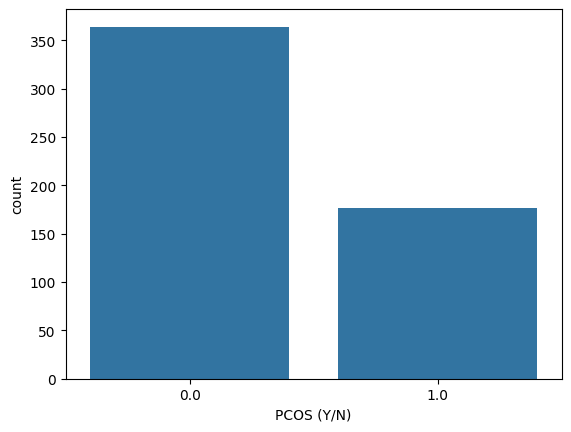

,count
PCOS (Y/N),
0.0,364
1.0,177


In [ ]:
sns.countplot(x='PCOS (Y/N)', data=df)
plt.show()
df['PCOS (Y/N)'].value_counts()

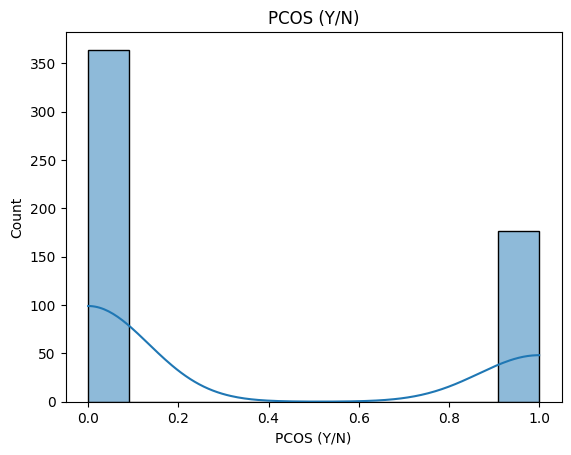

In [ ]:
numericalcols = ['PCOS (Y/N)']
for col in numericalcols:
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()

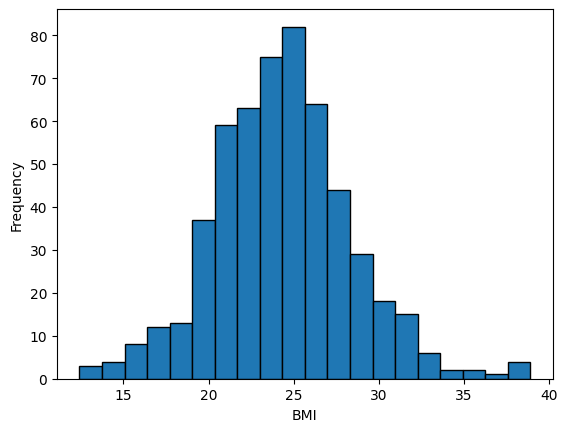

In [ ]:
plt.hist(df['BMI'], bins=20 , edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

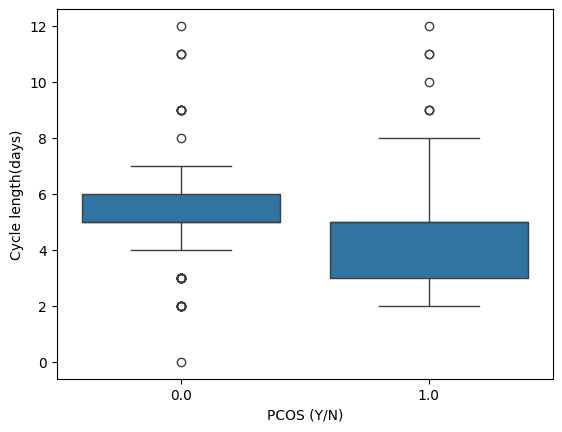

In [ ]:
sns.boxplot(x='PCOS (Y/N)', y='Cycle length(days)', data=df)
plt.show()

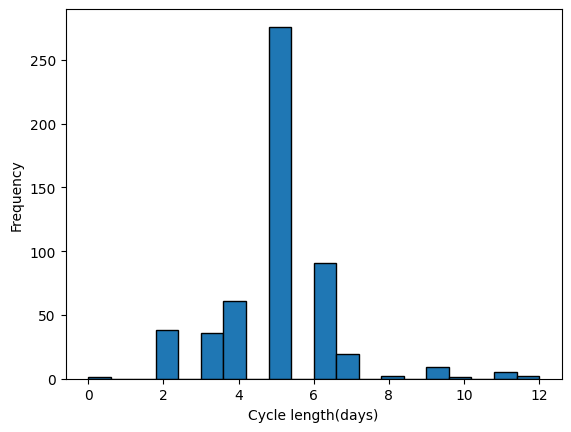

In [ ]:
plt.hist(df['Cycle length(days)'], bins=20 , edgecolor='black')
plt.xlabel('Cycle length(days)')
plt.ylabel('Frequency')
plt.show()

<Axes: ylabel='AMH(ng/mL)'>

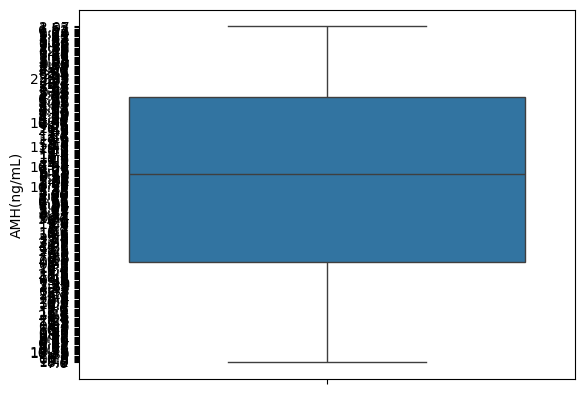

In [ ]:
sns.boxplot(data=df, y='AMH(ng/mL)')

<Axes: xlabel='PCOS (Y/N)', ylabel='FSH/LH'>

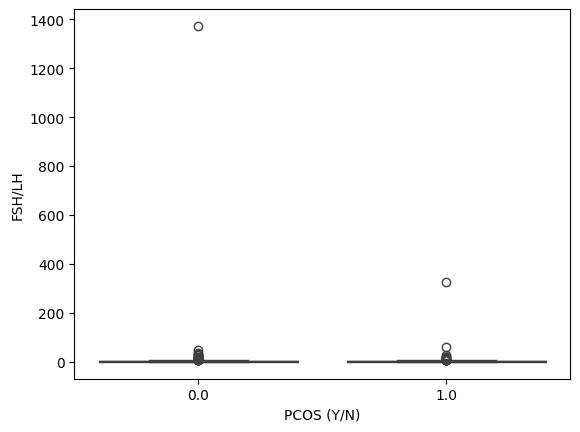

In [ ]:
sns.boxplot(data=df, y='FSH/LH', x = 'PCOS (Y/N)')

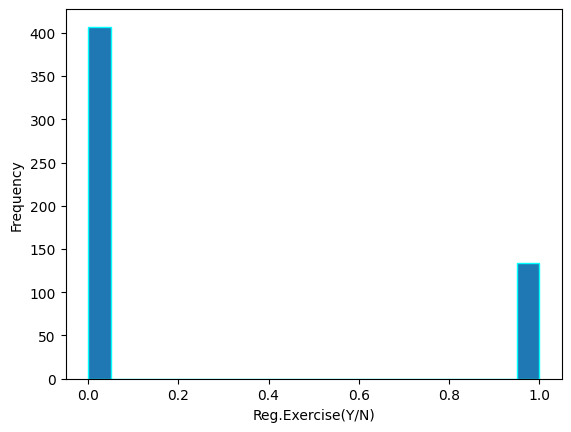

In [ ]:
plt.hist(df['Reg.Exercise(Y/N)'], bins=20 , edgecolor='cyan')
plt.xlabel('Reg.Exercise(Y/N)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
print(df.columns.tolist())

['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)', '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)']


In [ ]:
df['Fast food (Y/N)'] = df['Fast food (Y/N)'].fillna(df['Fast food (Y/N)'].mode()[0])
df['Marraige Status (Yrs)'] = df['Marraige Status (Yrs)'].fillna(df['Marraige Status (Yrs)'].mode()[0])

In [ ]:
print(df[['Fast food (Y/N)', 'Marraige Status (Yrs)']].isnull().sum())

Fast food (Y/N)          0
Marraige Status (Yrs)    0
dtype: int64


In [ ]:
np.set_printoptions(suppress=True)  # No scientific notation

numerical_features = ['Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)','Sl. No', 'Patient File No.']

for col in df.columns:
    if col not in numerical_features:
        print(f"\nColumn: {col}")  # Explicitly print the column name
        print(df[col].unique())     # Show unique values
        print("-" * 50)



Column: PCOS (Y/N)
[0. 1.]
--------------------------------------------------

Column:  Age (yrs)
[28. 36. 33. 37. 25. 34. 32. 20. 26. 38. 29. 31. 30. 41. 24. 27. 23. 35.
 39. 40. 22. 44. 21. 42. 43. 45. 47. 48. 46.]
--------------------------------------------------

Column: Weight (Kg)
[ 44.6  65.   68.8  52.   74.1  64.   58.5  40.   71.   49.   74.   50.
  57.3  80.5  43.   69.2  52.4  85.   64.2  63.   42.   76.   68.   62.
  56.   57.   58.   54.   73.   72.   53.   78.   33.   59.   75.   51.
  67.   60.   55.   61.   70.   48.  108.   57.6  43.7  61.6  69.5  74.4
  45.   83.5  62.5  67.5  91.4  61.7  62.2  64.3  68.6  80.   71.2  83.
  79.   89.   53.4  69.   56.4  49.3  53.2  60.8  46.   72.3  59.6  73.5
  88.   66.   66.3  47.   47.8  76.8  31.   74.3  58.1  53.6 104.   63.8
  62.7  32.   35.   34.   53.5  64.4  58.9  55.1  55.7  65.7  36.   55.5
  82.   80.4  77.9  60.5  76.9  65.6  38.   54.7  71.8  45.6  71.5  44.
  61.8  94.   66.1  87.9  44.8  49.1  52.9  54.3  63.2]
--

In [ ]:
df = df.drop(columns=['Sl. No', 'Patient File No.'])

In [ ]:
for col in df.select_dtypes(include='number').columns:
    df[col] = df[col].fillna(df[col].median())

In [ ]:
df['AMH(ng/mL)'] = pd.to_numeric(df['AMH(ng/mL)'], errors='coerce')
df['II    beta-HCG(mIU/mL)'] = pd.to_numeric(df['II    beta-HCG(mIU/mL)'], errors='coerce')

In [ ]:
import pandas as pd
columns = [' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Pulse rate(bpm) ', 'RR (breaths/min)',
           'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)',
           'No. of aborptions', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)',
           'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
           'PRG(ng/mL)', 'RBS(mg/dl)', 'Follicle No. (L)', 'Follicle No. (R)',
           '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)']
# Option 1: Remove rows with outliers in any of the selected columns
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

df_no_outliers = remove_outliers_iqr(df.copy(), columns)
# Option 2: Cap outliers for all specified columns
def cap_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower=lower, upper=upper)
    return df
df_capped = cap_outliers_iqr(df.copy(), columns)
# Display result
print("DataFrame with rows removed for outliers:\n", df_no_outliers.head())
print("DataFrame with capped outliers:\n", df_capped.head())


DataFrame with rows removed for outliers:
     PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)         BMI  Blood Group  \
13         0.0        38.0         50.0        152.0  21.641274         13.0   
14         0.0        34.0         57.3        162.0  21.833562         13.0   
17         0.0        36.0         69.2        160.0  27.031250         13.0   
18         0.0        31.0         52.4        159.0  20.727028         17.0   
22         0.0        34.0         64.2        155.0  26.722164         15.0   

    Pulse rate(bpm)   RR (breaths/min)  Hb(g/dl)  Cycle(R/I)  ...  \
13              74.0              20.0      12.1         2.0  ...   
14              74.0              22.0      11.7         2.0  ...   
17              72.0              18.0      10.8         2.0  ...   
18              72.0              18.0      12.7         2.0  ...   
22              74.0              20.0      12.1         2.0  ...   

    Reg.Exercise(Y/N)  BP _Systolic (mmHg)  BP _Diastolic (mm

In [ ]:
print(df['Cycle(R/I)'].unique())


[2. 4. 5.]


In [ ]:
df['Cycle(R/I)'].value_counts()

,count
Cycle(R/I),
2.0,390
4.0,150
5.0,1


In [ ]:
df['Blood Group'].value_counts()

,count
Blood Group,
15.0,206
13.0,135
11.0,108
17.0,42
16.0,19
14.0,16
12.0,13
18.0,2


In [ ]:
# Convert object columns to numeric
df["AMH(ng/mL)"] = pd.to_numeric(df["AMH(ng/mL)"], errors='coerce')
df["II    beta-HCG(mIU/mL)"] = pd.to_numeric(df["II    beta-HCG(mIU/mL)"], errors='coerce')
#it introduce the nan value to  it

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
X = df_capped.drop('PCOS (Y/N)', axis=1)
y = df_capped['PCOS (Y/N)']

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed_array = imputer.fit_transform(X)
X_cleaned = pd.DataFrame(X_imputed_array, columns=X.columns, index=X.index)

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
scaler = RobustScaler()
X_scaled_array = scaler.fit_transform(X_cleaned)
X_final = pd.DataFrame(X_scaled_array, columns=X_cleaned.columns, index=X_cleaned.index)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X_train.shape

(432, 41)

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

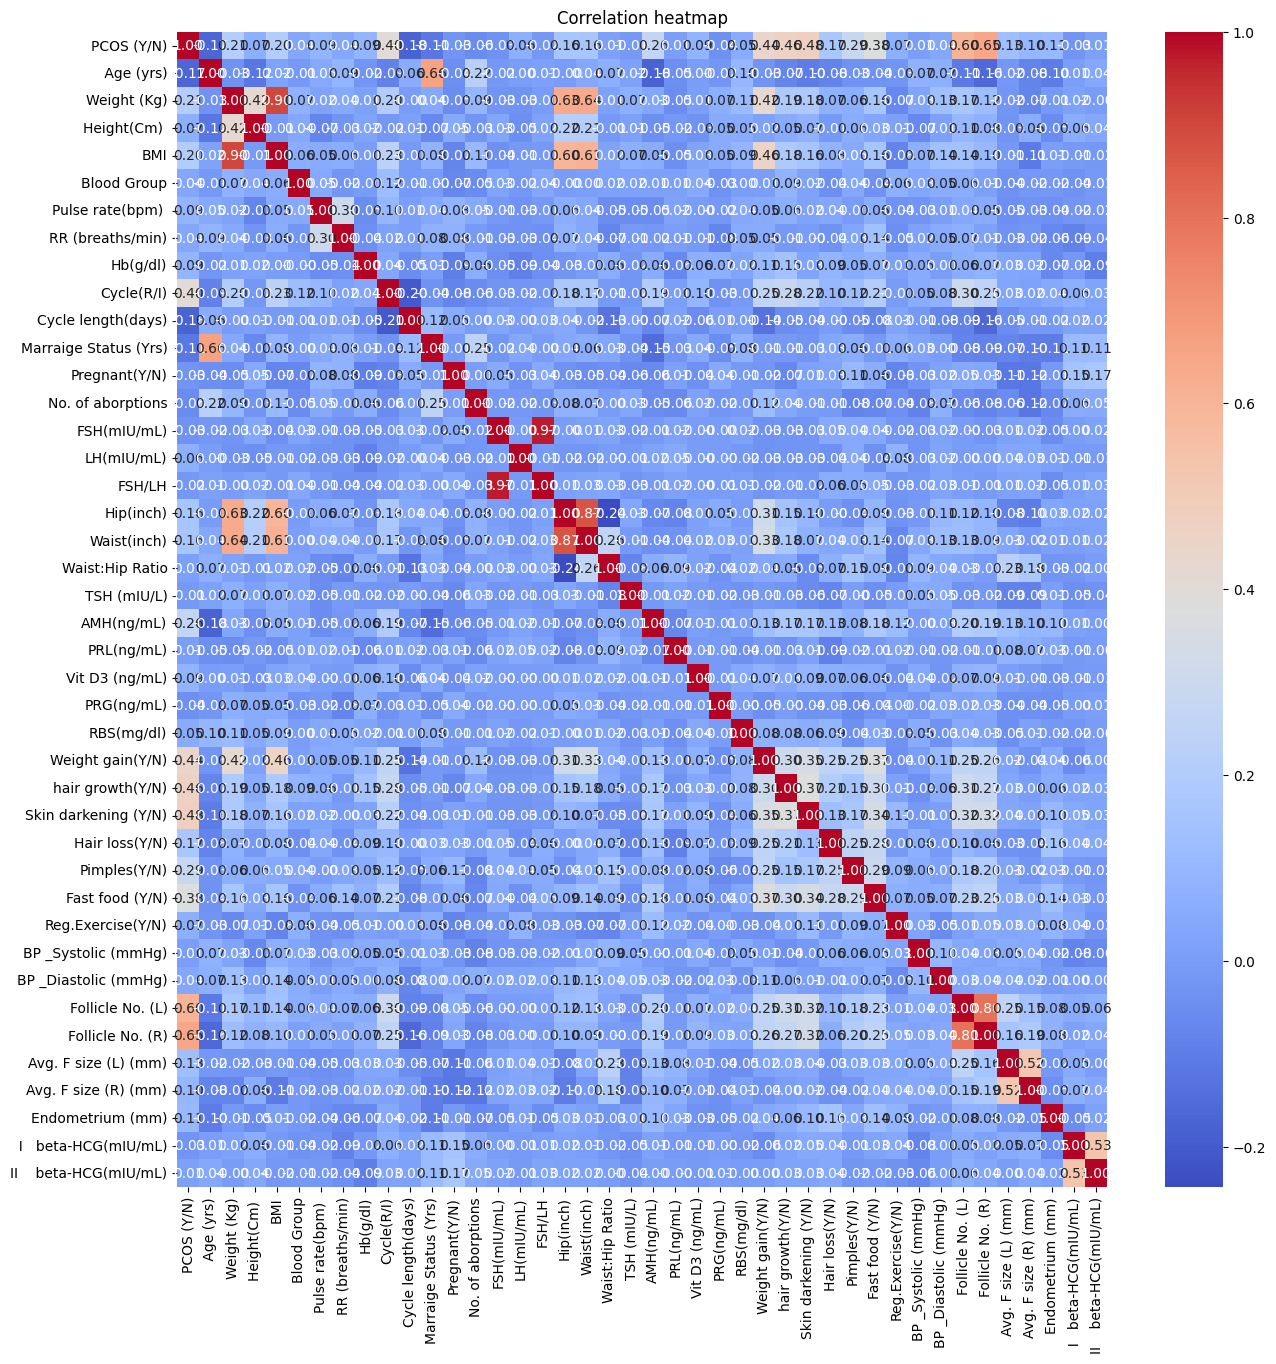

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

idk did we need to do heatmap

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n" , confusion_matrix(y_test, y_pred))
print("Classification Report:\n" , classification_report(y_test, y_pred))

Accuracy: 0.8899082568807339
Confusion Matrix:
 [[67  6]
 [ 6 30]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.92      0.92        73
         1.0       0.83      0.83      0.83        36

    accuracy                           0.89       109
   macro avg       0.88      0.88      0.88       109
weighted avg       0.89      0.89      0.89       109



In [ ]:
from sklearn.metrics import confusion_matrix

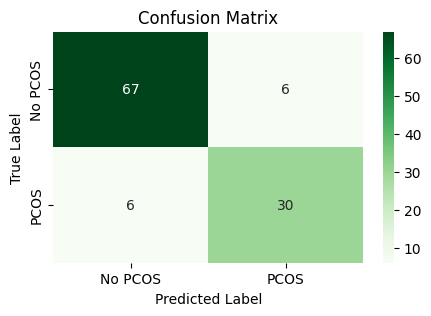

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['No PCOS', 'PCOS'], yticklabels=['No PCOS', 'PCOS'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [ ]:
cv = {}
for model_name, model in models.items():
    cv[model_name] = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
    print(f"{model_name} CV Accuracy: {cv[model_name].mean():.4f}")

Decision Tree CV Accuracy: 0.8473
Random Forest CV Accuracy: 0.9211
XGBoost CV Accuracy: 0.9005


In [ ]:
# Initializing models
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost_classifier = XGBClassifier(random_state=42)

In [ ]:
param_grid_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 20, 30, 50, 70],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}


param_grid_rf = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}


param_grid_xgb = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "subsample": [0.5, 0.7, 1.0],
    "colsample_bytree": [0.5, 0.7, 1.0]
}


In [ ]:
random_search_dt = RandomizedSearchCV(estimator=decision_tree, param_distributions=param_grid_dt, n_iter=20, cv=5, scoring="accuracy", random_state=42)
random_search_rf = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid_rf, n_iter=20, cv=5, scoring="accuracy", random_state=42)
random_search_xgb = RandomizedSearchCV(estimator=xgboost_classifier, param_distributions=param_grid_xgb, n_iter=20, cv=5, scoring="accuracy", random_state=42)

In [ ]:
random_search_dt.fit(X_train_resampled, y_train_resampled)
random_search_rf.fit(X_train_resampled, y_train_resampled)
random_search_xgb.fit(X_train_resampled, y_train_resampled)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [ ]:
random_search_dt.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=30, random_state=42)

In [ ]:
random_search_dt.best_score_

np.float64(0.87991452991453)

In [ ]:
random_search_rf.best_estimator_

RandomForestClassifier(max_depth=30, min_samples_split=10, n_estimators=50,
                       random_state=42)

In [ ]:
random_search_rf.best_score_

np.float64(0.9279546124373711)

In [ ]:
random_search_xgb.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
random_search_xgb.best_score_

np.float64(0.9245358090185677)

In [ ]:
# Get the model with best score

best_model = None
best_score = 0

#best_model: will hold the best-performing model
#best_score: starts with 0 and will be updated with the highest score


if random_search_dt.best_score_ > best_score:
  best_model = random_search_dt.best_estimator_
  best_score = random_search_dt.best_score_

if random_search_rf.best_score_ > best_score:
  best_model = random_search_rf.best_estimator_
  best_score = random_search_rf.best_score_

if random_search_xgb.best_score_ > best_score:
  best_model = random_search_xgb.best_estimator_
  best_score = random_search_xgb.best_score_


#random_search_dt.best_score_ (0.85) > best_score (0):
#Yes → Set best_model = random_search_dt.best_estimator_, best_score = 0.85
#random_search_rf.best_score_ (0.919) > best_score (0.85):
#Yes → Set best_model = random_search_rf.best_estimator_, best_score = 0.919
#random_search_xgb.best_score_ (0.90) > best_score (0.919):
#No: Set best_model = random_search_rf.best_estimator_, best_score = 0.919


In [ ]:
print(f'Best Model: {best_model}')
print(f'Best Score: {best_score:.2f}')

Best Model: RandomForestClassifier(max_depth=30, min_samples_split=10, n_estimators=50,
                       random_state=42)
Best Score: 0.93


In [ ]:
y_test_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Accuracy: 0.908256880733945
Confusion Matrix:
 [[70  3]
 [ 7 29]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.96      0.93        73
         1.0       0.91      0.81      0.85        36

    accuracy                           0.91       109
   macro avg       0.91      0.88      0.89       109
weighted avg       0.91      0.91      0.91       109



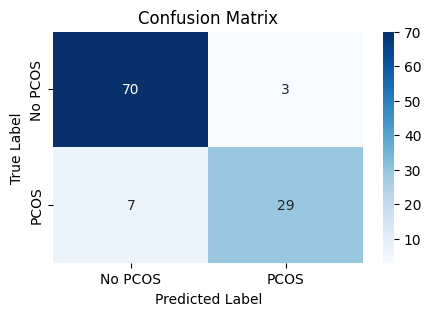

In [ ]:
cm1 = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=['No PCOS', 'PCOS'], yticklabels=['No PCOS', 'PCOS'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()